In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

%autosave 1

Autosaving every 1 seconds


In [111]:
data = pd.read_csv('/content/DailyDelhiClimate.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head(15)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,14.000000,51.250000,12.500000,1017.000000


In [112]:
#data description
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: >

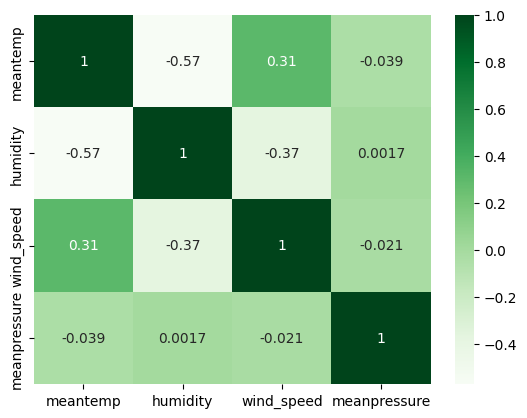

In [113]:
data_corr=data.corr()
sns.heatmap(data_corr,cmap="Greens", annot=True)

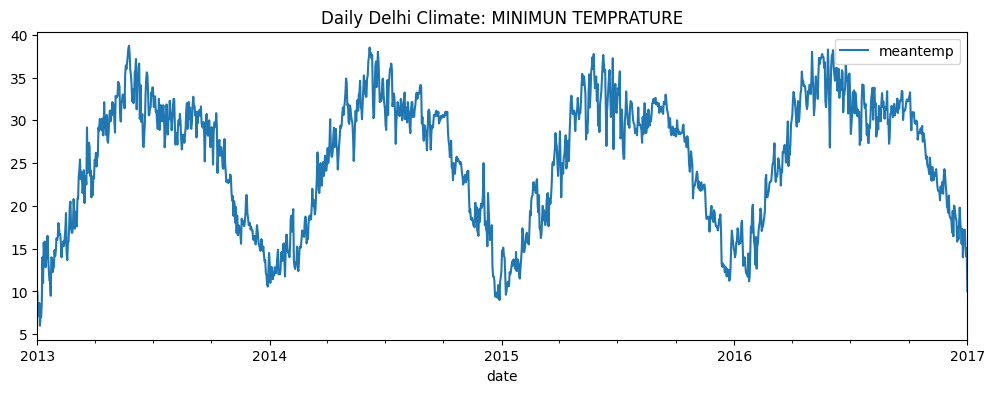

In [114]:
data['meantemp'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Daily Delhi Climate: MINIMUN TEMPRATURE')
plt.show(block=False)

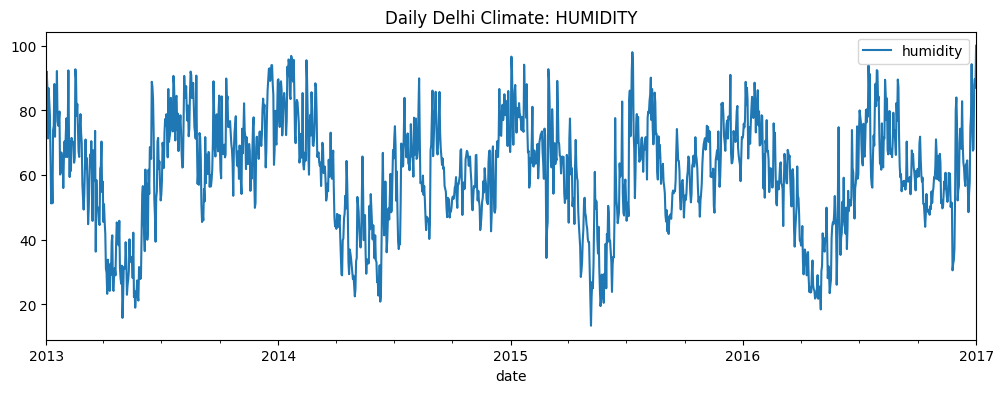

In [115]:
data['humidity'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Daily Delhi Climate: HUMIDITY')
plt.show(block=False)

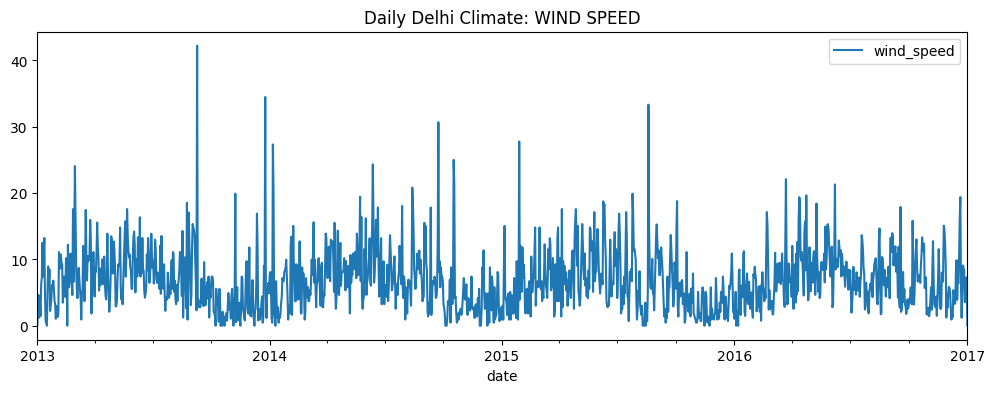

In [116]:
data['wind_speed'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Daily Delhi Climate: WIND SPEED')
plt.show(block=False)

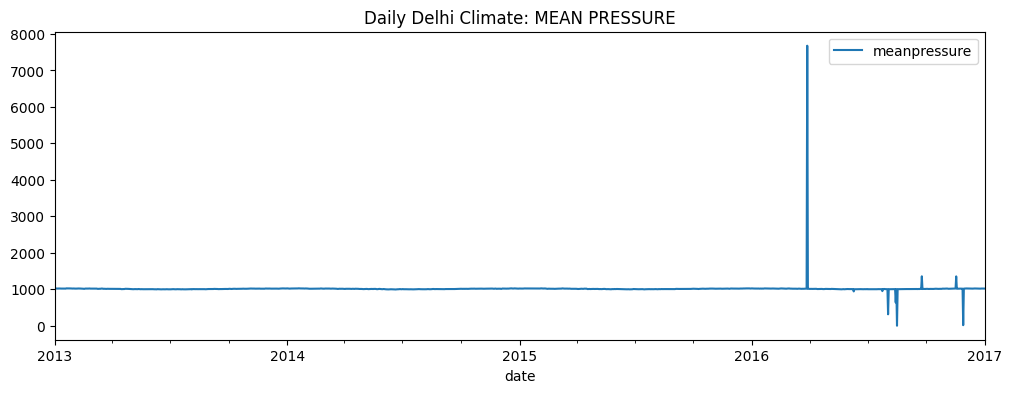

In [117]:
data['meanpressure'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Daily Delhi Climate: MEAN PRESSURE')
plt.show(block=False)

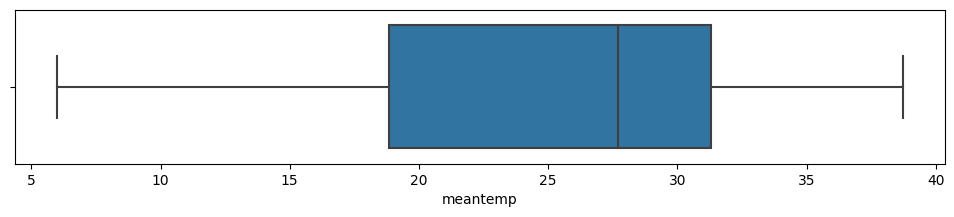

In [118]:
# Outlier detection
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['meantemp'],whis=1.5)

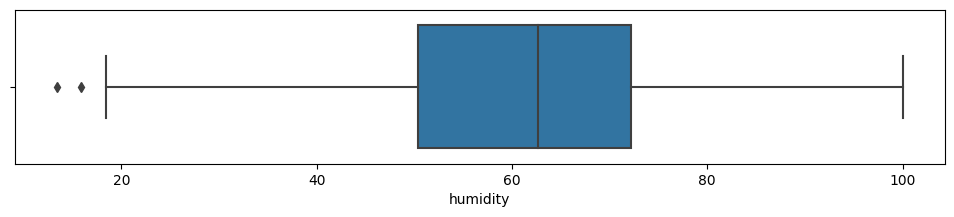

In [119]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['humidity'],whis=1.5)

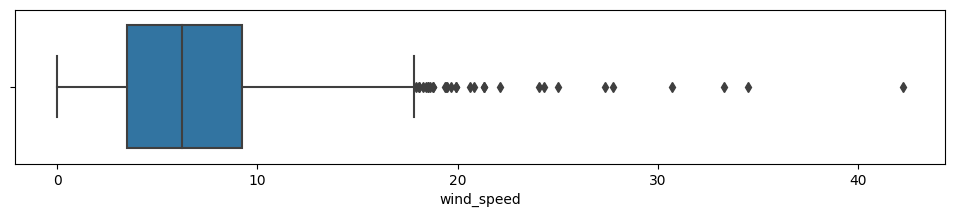

In [120]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['wind_speed'],whis=1.5)

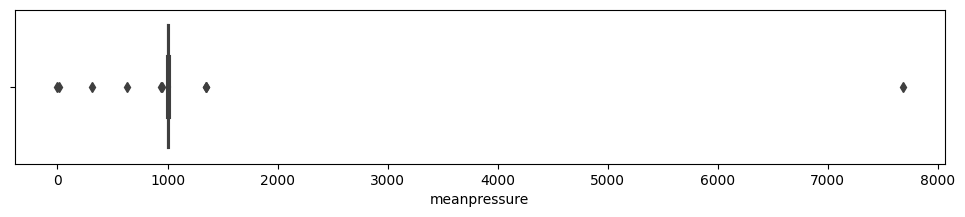

In [121]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['meanpressure'],whis=1.5)

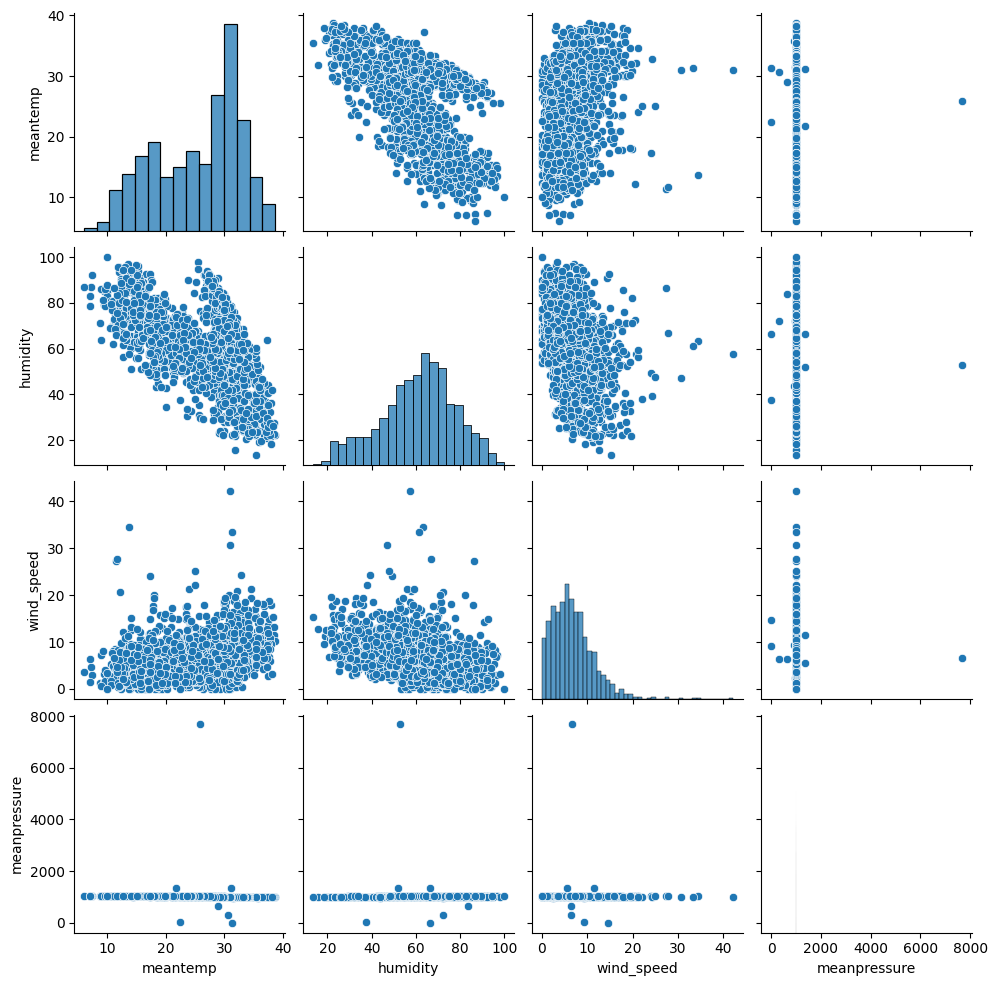

In [122]:
sns.pairplot(data)

In [123]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [124]:
data.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [125]:
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
target = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [126]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [127]:
# Create sequences for input and output
sequence_length = 7  # Choose an appropriate sequence length
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[features].values[i:i+sequence_length])
    y.append(data[target].values[i+sequence_length])

X, y = np.array(X), np.array(y)

In [128]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [129]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, len(features)), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(len(target)))

In [130]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [131]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/100
37/37 [==============================] - 4s 13ms/step - loss: 0.0412
Epoch 2/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 3/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 4/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 5/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 7/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 9/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 10/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 11/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 12/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 13/100
37/37 [============

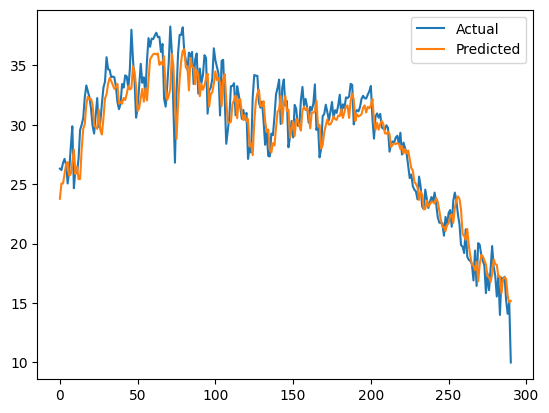

In [132]:
# Inverse transform the scaled data to get actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Plot the results (for one of the variables, e.g., meantemp)
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.legend()
plt.show()

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to calculate and print error metrics
def evaluate_forecast(y_true, y_pred, variable_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Variable: {variable_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}\n")

# Calculate and print error metrics for each variable
for i, var_name in enumerate(target):
    evaluate_forecast(y_test[:, i], y_pred[:, i], var_name)


Variable: meantemp
Mean Squared Error (MSE): 3.04
Root Mean Squared Error (RMSE): 1.74
Mean Absolute Error (MAE): 1.36
R-squared (R2): 0.91

Variable: humidity
Mean Squared Error (MSE): 58.15
Root Mean Squared Error (RMSE): 7.63
Mean Absolute Error (MAE): 5.62
R-squared (R2): 0.80

Variable: wind_speed
Mean Squared Error (MSE): 13.79
Root Mean Squared Error (RMSE): 3.71
Mean Absolute Error (MAE): 2.95
R-squared (R2): 0.15

Variable: meanpressure
Mean Squared Error (MSE): 163087.09
Root Mean Squared Error (RMSE): 403.84
Mean Absolute Error (MAE): 66.53
R-squared (R2): -0.00

